# Hands on: Simple Binary Classifier with Keras

## The task:
In next example we will create a simple binary classifier that predicts whether a person is an adult or a child based on their height and weight


### Import necessary libraries

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense


## Load and prepare the data

In [21]:
df = pd.read_csv('https://media.githubusercontent.com/media/geekcourses/ML_SA-Slides/refs/heads/main/pages/themes/ANN_DeepLearning_Keras/examples/keras_intro_child_adults/adulat_child_1.csv')
df

,height,weight,age
0,174.125607,70.345060,1
1,120.867691,30.756327,0
2,176.109308,71.767368,1
3,119.414350,29.891714,0
4,177.493092,71.611111,1
...,...,...,...
9995,176.559964,70.677399,1
9996,176.279933,69.098633,1
9997,173.713293,70.194822,1
9998,175.987975,70.377601,1


<Axes: xlabel='height', ylabel='weight'>

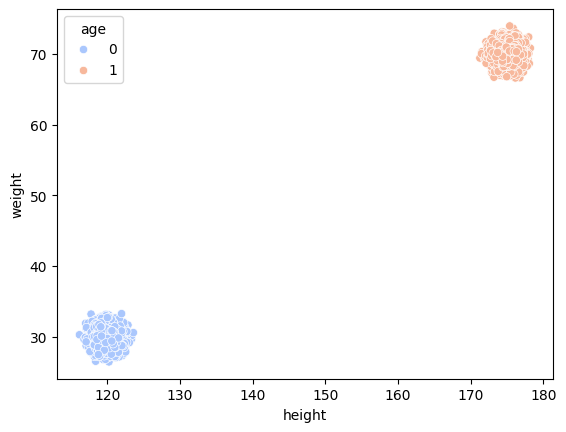

In [22]:
### plot the data
sns.scatterplot(data=df, x='height', y='weight', hue='age', palette='coolwarm')

In [23]:
# Split features and target
X = df[['height', 'weight']].values  # Features: height and weight
y = df['age'].values                 # Target: age (0 for child, 1 for adult)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Define model architecture

We will create a neural network model with two sequential dense layers (a layer of neurons in which each neuron is connected to every neuron in the preceding layer):

1. The first one will be the input layer with 4 units (neurons) and uses the relu activation function. It also has an input dimentions of 2, which specifies that the input data to the neural network has two features.

2. The second dense layer - the output one - has 1 unit and uses the sigmoid activation function. This layer is used for binary classification problems, where the output is a single probability value between 0 and 1 indicating the probability of the input belonging to the positive class.

With Sequential() function, we create a model object to which we add layers, one at a time, using the .add() method. This is a simple and straightforward way to create a neural network in Keras.

In [24]:
model = Sequential()
model.add(Dense(units=32, input_dim=2,activation="relu"))
model.add(Dense(units=1,activation='sigmoid'))

/media/nemsys/data/projects/courses/netIT/ML_SA/ML_SA_Labs/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### How to select the optimal number of units in a layer?

The optimal number of units for a given layer depends on several factors, including the complexity of the problem, the size of the training data, and the architecture of the neural network. 
Here are some general guidelines that you can follow to set the number of units in a layer:

*Start with a small number of units*: It's usually a good idea to start with a small number of units and gradually increase the number as needed. This can help prevent overfitting and reduce the computational cost of training the network.

*Use a rule of thumb*: There are several rules of thumb for determining the number of units in a layer, such as the "sqrt" rule, which suggests using the square root of the number of inputs to the layer (i.e. number of features), or the "2/3" rule, which suggests using 2/3 of the number of inputs to the layer. These rules can provide a starting point for setting the number of units, but they may not be optimal for all problems.

Experiment with different values: The best way to determine the optimal number of units for a given layer is to experiment with different values and evaluate the performance of the network on a validation set. You can try increasing or decreasing the number of units in the layer and see how it affects the performance of the network.

### Compile and fit the model

In [25]:
# Compile your model
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=8,
    validation_split=0,
    verbose=1
)

Epoch 1/10


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4927 - loss: 8.3684
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5141 - loss: 0.6935
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4968 - loss: 0.6942
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5023 - loss: 0.6937
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4935 - loss: 0.6941
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4996 - loss: 0.6939
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4949 - loss: 0.6939
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4978 - loss: 0.6937
Epoch 9/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4948 - loss: 0.6946
Epoch 10/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4946 - loss: 0.6942


In [26]:
model.layers

[<Dense name=dense_4, built=True>, <Dense name=dense_5, built=True>]

In [27]:
# Print fitted model parameters
for layer in model.layers:
    print(f"Layer {layer.name} weights: {layer.get_weights()}")


Layer dense_4 weights: [array([[-4.8111710e-01, -2.5597696e+00, -1.3259154e+01, -3.6265728e-01,
        -2.5131792e-02, -2.6479381e-01, -1.9870187e-01, -2.2359252e-01,
        -4.0463039e-01, -6.4494640e-02, -5.4799765e-02,  5.9650004e-02,
        -1.1204501e+00, -3.5485405e-01, -6.3294280e-01, -1.5749577e-01,
        -3.7903196e-01, -1.9862579e+01, -2.1367044e+00, -1.1723279e+00,
        -3.3049732e-02, -4.0500006e-01, -1.3953730e-01, -4.0617299e-01,
         4.6502560e-02, -5.2349691e+00, -3.5516894e-01, -2.2214407e-01,
        -2.9362679e-02, -1.9195681e+00, -2.0607063e-01, -2.1620655e+01],
       [-3.5882246e-01, -1.6124423e+00, -5.8683305e+00,  7.6138169e-02,
        -3.9874932e-01,  4.0337041e-01, -2.2114724e-02, -4.6854508e-01,
         4.4194579e-02, -2.6989865e-01, -1.4404383e-01, -4.1415411e-01,
        -1.5377071e-01,  2.8764388e-01, -2.0788425e-01, -2.0495683e-02,
        -2.5558549e-01, -7.9911509e+00, -1.2920823e+00, -4.8142621e-01,
        -2.1696058e-01, -4.1750583e-01,

### Evaluate the model and make predictions

In [28]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {test_acc:.2f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4874 - loss: 0.6973
Test Accuracy: 0.49


In [29]:
# Make predictions on new data  [Height, Weight]
new_data = np.array([[190, 120], [220,  120]])
predictions = model.predict(new_data)

print(predictions)
# print("Predicted Classes:", (predictions > 0.5).astype(int))  # 0 = Child, 1 = Adult

predicted_classes = predictions.argmax(axis=-1)
print(predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
[[0.46553802]
 [0.46553802]]
[0 0]


### Improve model performance: tune model hyperparameters

We see that model performance is not quite good. We can improve it by:

1. Increasing the amount of training data: The more data you have, the better your model can learn to generalize to new examples. You could try generating more training data or finding additional real-world data to add to your training set.

2. Improve the quality of the training data: Make sure that your training data is representative of the problem you're trying to solve and that it is labeled correctly. If your training data contains errors or is biased, your model's performance will suffer.

3. Adjust the model architecture: Experiment with different numbers of layers, units, and activation functions in your model. You could also try adding regularization (such as dropout or weight decay) to prevent overfitting.

4. Tune the hyperparameters: The hyperparameters (such as learning rate, batch size, and number of epochs) can have a big impact on your model's performance. Try different combinations of hyperparameters and use a validation set to evaluate their effectiveness.


#### Key Hyperparameters to Tune in Keras
1. **Learning Rate** (`optimizer` parameter):
   The **learning rate** is a hyperparameter that controls how much the model’s weights are adjusted with respect to the loss gradient during training. It determines the step size taken during optimization in the direction of minimizing the loss function. 

   - **Too High Learning Rate**:
      - Causes the model to converge quickly, but the steps are too large.
      - Leads to **oscillations** and potentially **diverges** from the optimal solution.
      
   - **Too Low Learning Rate**:
      - Takes smaller steps, making the training process very slow.
      - Might get **stuck in local minima** and fail to reach the global minimum.

   - Example: `0.001`, `0.01`, `0.0001`

2. **Batch Size**:
   - Defines the number of training samples to be used in one forward and backward pass during the training process. It determines how many samples are processed before the model updates its internal parameters (weights).

   - Example: `16`, `32`, `64`

3. **Number of Layers and Units**:
   - Choose the number of hidden layers and units in each layer.
   - Example: `(64, 32, 16)` vs. `(128, 64, 32)`

4. **Activation Functions**:
   - Try different activations like `relu`, `sigmoid`, `tanh`.
   
5. **Dropout Rate**:
   - **Dropout** is a regularization technique used to prevent **overfitting** in neural networks. During training, dropout randomly sets a fraction of the neurons (units) to zero at each layer, effectively “dropping out” those neurons from the network temporarily.

   - The **dropout rate** is a hyperparameter that defines the fraction of neurons to be dropped during training. It is a value between `0` and `1`:

      - **Dropout Rate = 0**: No units are dropped.
      - **Dropout Rate = 0.5**: 50% of units are dropped randomly.
      - **Dropout Rate = 1**: All units are dropped, making the network inactive (not recommended).

   - Example: `0.2`, `0.5`

6. **Optimizer Type**:
   - Different optimizers can converge differently (e.g., `adam`, `sgd`, `rmsprop`).



### 3. Hyperparameter Tuning with `keras-tuner`
You can use the `keras-tuner` library to automate the hyperparameter tuning process.



In [30]:
# import tensorflow as tf
# from tensorflow.keras import layers
# from kerastuner import HyperModel
# from kerastuner.tuners import RandomSearch

# # Define a hypermodel class
# class MyHyperModel(HyperModel):
#     def build(self, hp):
#         model = tf.keras.Sequential()
#         # Tune number of hidden layers
#         for i in range(hp.Int('num_layers', 1, 3)):
#             model.add(layers.Dense(units=hp.Int('units_' + str(i),
#                                                 min_value=32,
#                                                 max_value=128,
#                                                 step=32),
#                                    activation='relu'))
#             model.add(layers.Dropout(rate=hp.Float('dropout_' + str(i),
#                                                    min_value=0.0,
#                                                    max_value=0.5,
#                                                    step=0.1)))
#         model.add(layers.Dense(1, activation='sigmoid'))
#         model.compile(optimizer='adam',
#                       loss='binary_crossentropy',
#                       metrics=['accuracy'])
#         return model

# # Instantiate and run Random Search
# tuner = RandomSearch(
#     MyHyperModel(),
#     objective='val_accuracy',
#     max_trials=5,
#     executions_per_trial=3,
#     directory='my_dir',
#     project_name='hyperparameter_tuning')

# # Split the dataset for tuning
# tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [31]:
# # Print the best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# print(f"""
# The best number of layers is: {best_hps.get('num_layers')}
# The units in each layer are: {[best_hps.get(f'units_{i}') for i in range(best_hps.get('num_layers'))]}
# The dropout rates for each layer are: {[best_hps.get(f'dropout_{i}') for i in range(best_hps.get('num_layers'))]}
# """)